# Simulating from the prior

Two ways of simulating from the following model:

$$
\begin{aligned}
y_i &\sim \text{Normal}(\mu, \sigma) \\
\mu &\sim \text{Normal}(0,10) \\
\sigma &\sim \text{Exponential}(1) \\
\end{aligned}
$$

First: simulate with numpy random

In [1]:
import numpy as np

np.random.seed(42)

In [2]:
n = 100

μ = np.random.normal(0,10,n)   # prior
σ = np.random.exponential(1,n) # prior
y = np.random.normal(μ, σ, n)  # likelihood

Text(0.5, 0.98, 'Samples of $y$ from Prior')

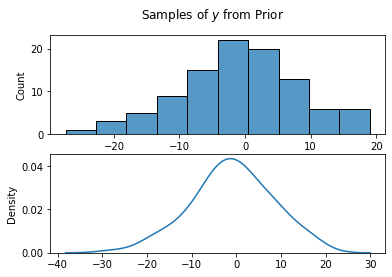

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2)
sns.histplot(y, ax=ax[0])
sns.kdeplot(y, ax=ax[1])
fig.suptitle("Samples of $y$ from Prior")

## Pymc

In [4]:
import pymc as pm
import arviz as az

In [5]:
# Simulate the model in pymc
basic_model = pm.Model()

with basic_model:
    # specify the priors
    μ = pm.Normal("μ", 0,10)
    σ = pm.Exponential("σ", 1)
    y = pm.Normal("y", μ, σ)
    
    # Sample from the prior
    priors = pm.sample_prior_predictive(samples=100)

Text(0.5, 1.0, 'Prior Predictive values of $y$')

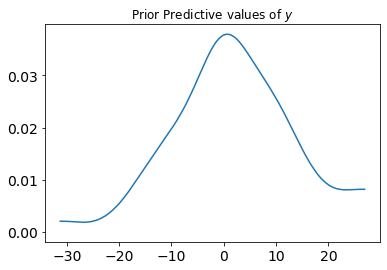

In [6]:
# Plot the results
fig, ax = plt.subplots()

ax = az.plot_dist(priors.prior["y"].values)
ax.set_title("Prior Predictive values of $y$")